In [1]:

import awkward as ak
from pathlib import Path
import time
import matplotlib.pyplot as plt
import uproot
import infofile, newinfofile
lumi = 10 #for Data A/B/C/D

In [2]:
data_dir = Path("/project/etp1/dkoch/ATLASOpenData-test")
samples_new = {
    "ttbar": {
        "list": [
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000020.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000002.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000003.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000004.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000005.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000008.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000009.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000010.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000011.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000012.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000013.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000014.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000016.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000017.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000018.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000019.output_ntup.root",
#             data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000020.output_ntup.root",
        ]
    }
}
treename_new = "analysis"
branches_new = [
    "lep_pt","lep_eta","lep_phi",
    "lep_e","lep_charge","lep_type", "lep_n",
    "mcWeight",'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_e',
    
 'mcWeight',
      "ScaleFactor_PILEUP",
     "ScaleFactor_ELE",
     "ScaleFactor_MUON",
    "ScaleFactor_BTAG",
    "ScaleFactor_PHOTON",
     "ScaleFactor_TAU",
 
    
   
]
#Previous Fields:

# treename_new = "analysis"
# branches_new = [
#     "lep_pt","lep_eta","lep_phi",
#     "lep_e","lep_charge","lep_type", "lep_n",
#     "mcWeight",
#     # "scaleFactor_PILEUP",
#     # "scaleFactor_ELE",
#     # "scaleFactor_MUON",
# ]

samples_old = {
    "ttbar": {
        "list": [
            # "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_410000.ttbar_lep.2lep.root",
            '/home/i/I.Kuscu/bachelorarbeit/file_test/mc_410000.ttbar_lep.2lep.root'
        ]
    }
}
treename_old = "mini"
branches_old = [
    "lep_pt","lep_eta","lep_phi",
    "lep_E","lep_charge","lep_type", "lep_n",
    "mcWeight", "scaleFactor_PILEUP",
    "scaleFactor_ELE","scaleFactor_MUON",
    "scaleFactor_LepTRIGGER",'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
 'scaleFactor_BTAG',
 "scaleFactor_PHOTON",
"scaleFactor_TAU", 
    #Previous Fields:

    
# treename_old = "mini"
# branches_old = [
#     "lep_pt","lep_eta","lep_phi",
#     "lep_E","lep_charge","lep_type", "lep_n",
#     "mcWeight", "scaleFactor_PILEUP",
#     "scaleFactor_ELE","scaleFactor_MUON",
#     "scaleFactor_LepTRIGGER",
    
]

In [3]:
def calc_weight(xsec_weight, events):
    return (
        #xsec_weight ohne xsec
         events.mcWeight
        * events.scaleFactor_PILEUP
        * events.scaleFactor_ELE
        * events.scaleFactor_MUON 
        * events.scaleFactor_LepTRIGGER
    )

In [4]:
def get_new_data(samples, treename, branches):
    data = {}
    for s in samples:
        print(f"processing {s} samples")
        chunks = []
        for chunk in uproot.iterate({file: treename for file in samples[s]["list"]}, expressions=branches):
            n_in = len(chunk)
            chunk = chunk[chunk.lep_n>=2]
            n_out = len(chunk)
            print(f"  processed {n_in} events, kept {n_out}")
            chunks.append(chunk)
        data[s] = ak.concatenate(chunks)
    return data

In [5]:
start = time.time()
data_new = get_new_data(samples_new, treename_new, branches_new)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 326752 events, kept 164409
took 1.3909008502960205s


In [6]:
start = time.time()
data_old = get_new_data(samples_old, treename_old, branches_old)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 840347 events, kept 840347
  processed 840347 events, kept 840347
  processed 840347 events, kept 840347
  processed 389498 events, kept 389498
took 12.388035535812378s


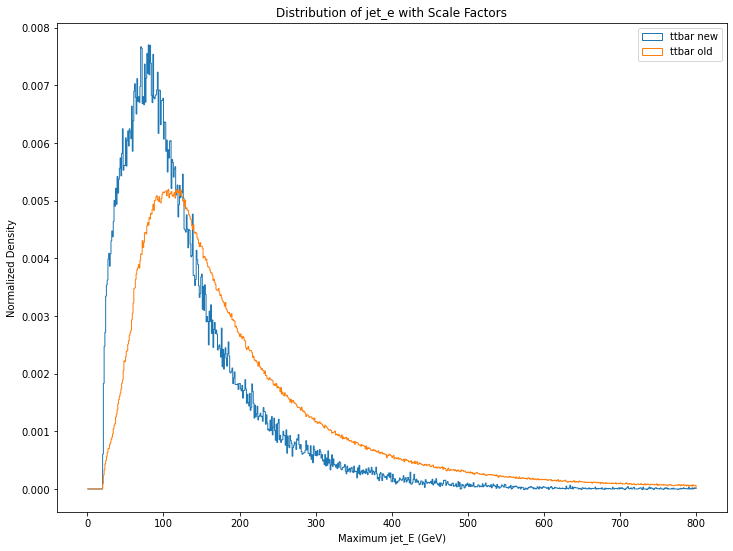

In [34]:
import matplotlib.pyplot as plt
import awkward as ak  # Assuming you are using Awkward Array for data manipulation

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].jet_e, axis = 1), 
        range=(0, 800),
        weights=(
            data_new[sample].ScaleFactor_PILEUP *
            data_new[sample].ScaleFactor_ELE *
            data_new[sample].ScaleFactor_MUON *
            data_new[sample].ScaleFactor_BTAG
           
        
        ),
        bins=800,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].jet_E , axis = 1) / 1000,  # scaleFactor from MeV to GeV
        range=(0, 800),
        weights=(
            data_old[sample].scaleFactor_PILEUP *
            data_old[sample].scaleFactor_ELE *
            data_old[sample].scaleFactor_MUON *
            data_old[sample].scaleFactor_BTAG
            
        ),
        bins=800,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_e with Scale Factors")
plt.xlabel("Maximum jet_E (GeV)")
plt.ylabel("Normalized Density")

plt.show()


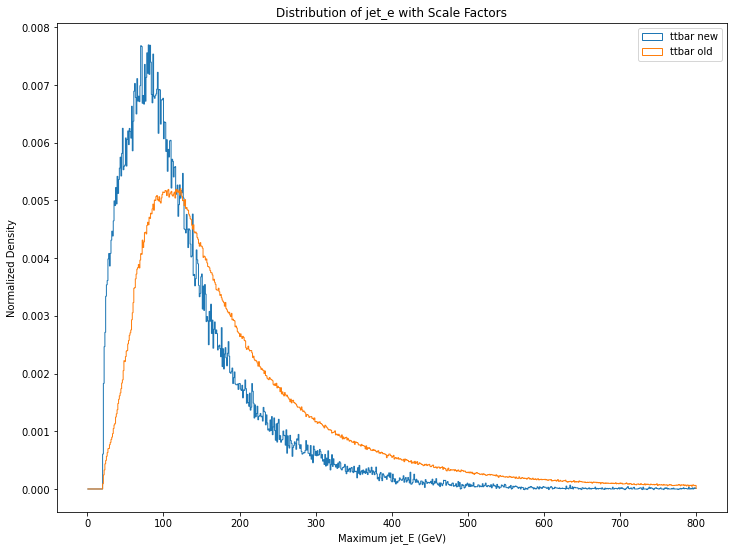

In [8]:
import matplotlib.pyplot as plt
import awkward as ak  # Assuming you are using Awkward Array for data manipulation

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].jet_e, axis = 1), 
        range=(0, 800),
        weights=(
            data_new[sample].ScaleFactor_PILEUP *
            data_new[sample].ScaleFactor_ELE *
            data_new[sample].ScaleFactor_MUON 
           
        ),
        bins=800,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].jet_E , axis = 1) / 1000,  # scaleFactor from MeV to GeV
        range=(0, 800),
        weights=(
            data_old[sample].scaleFactor_PILEUP *
            data_old[sample].scaleFactor_ELE *
            data_old[sample].scaleFactor_MUON 
            
        ),
        bins=800,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_e with Scale Factors")
plt.xlabel("Maximum jet_E (GeV)")
plt.ylabel("Normalized Density")

plt.show()


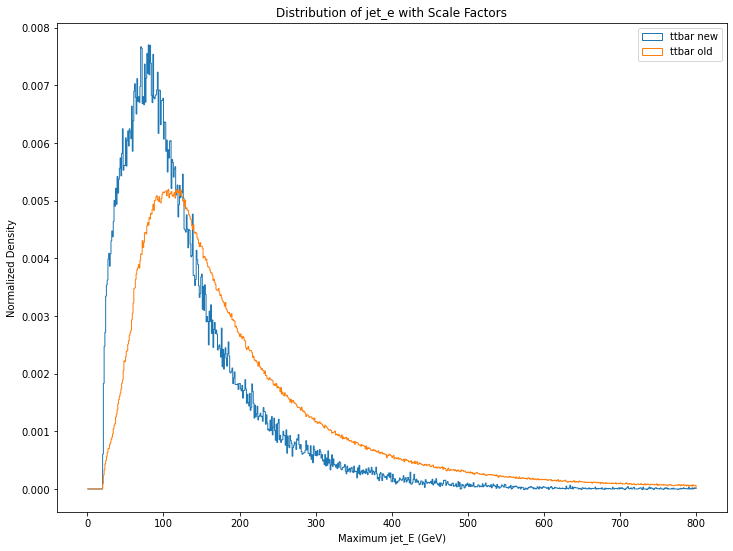

In [9]:
import matplotlib.pyplot as plt
import awkward as ak  # Assuming you are using Awkward Array for data manipulation

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].jet_e, axis = 1), 
        range=(0, 800),
        weights=(
            data_new[sample].ScaleFactor_PILEUP *
            data_new[sample].ScaleFactor_ELE *
            data_new[sample].ScaleFactor_MUON *
            data_new[sample].ScaleFactor_BTAG
        ),
        bins=800,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].jet_E , axis = 1) / 1000,  # scaleFactor from MeV to GeV
        range=(0, 800),
        weights=(
            data_old[sample].scaleFactor_PILEUP *
            data_old[sample].scaleFactor_ELE *
            data_old[sample].scaleFactor_MUON *
            data_old[sample].scaleFactor_BTAG
        ),
        bins=800,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_e with Scale Factors")
plt.xlabel("Maximum jet_E (GeV)")
plt.ylabel("Normalized Density")

plt.show()


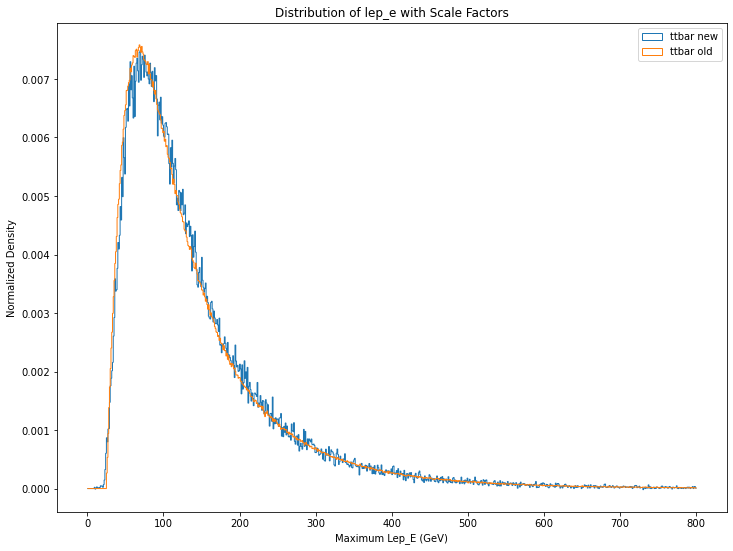

In [10]:
import matplotlib.pyplot as plt
import awkward as ak  

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].lep_e, axis = 1), 
        range=(0, 800),
        weights=(
            data_new[sample].ScaleFactor_PILEUP *
            data_new[sample].ScaleFactor_ELE *
            data_new[sample].ScaleFactor_MUON
        ),
        bins=800,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].lep_E , axis = 1) / 1000,  # scaleFactor from MeV to GeV
        range=(0, 800),
        weights=(
            data_old[sample].scaleFactor_PILEUP *
            data_old[sample].scaleFactor_ELE *
            data_old[sample].scaleFactor_MUON
        ),
        bins=800,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of lep_e with Scale Factors")
plt.xlabel("Maximum Lep_E (GeV)")
plt.ylabel("Normalized Density")

plt.show()


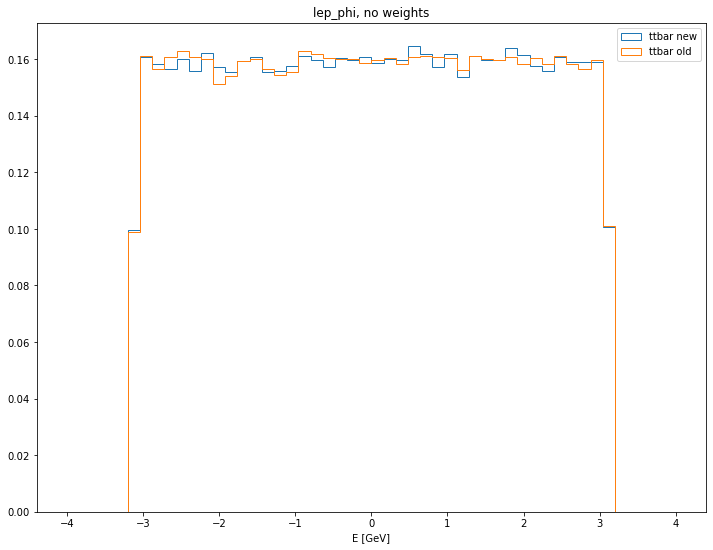

In [11]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_phi), range=(-4, 4), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_phi), range=(-4, 4), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_phi, no weights")
plt.xlabel("E [GeV]")
plt.show()

In [12]:
data_new[sample].lep_pt
ak.max(data_new[sample].lep_pt, axis = 1)

<Array [82.9, 44.5, 41.5, 67.8, ..., 117, 48, 49.4] type='164409 * ?float32'>

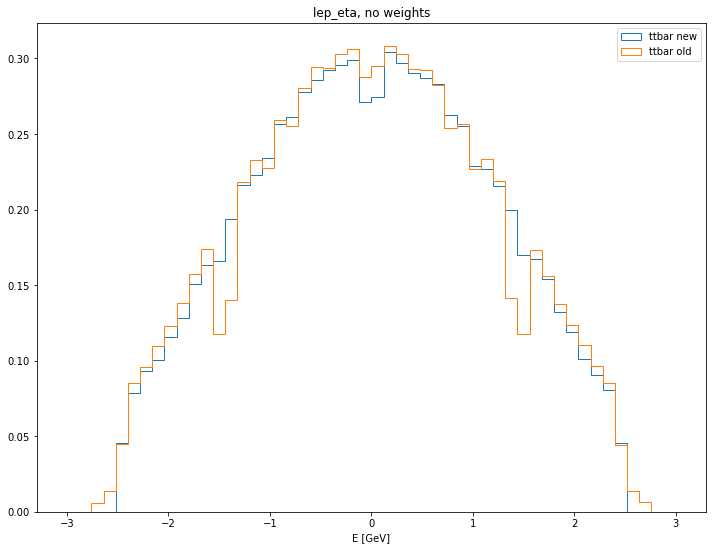

In [13]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_eta, no weights")
plt.xlabel("E [GeV]")
plt.show()

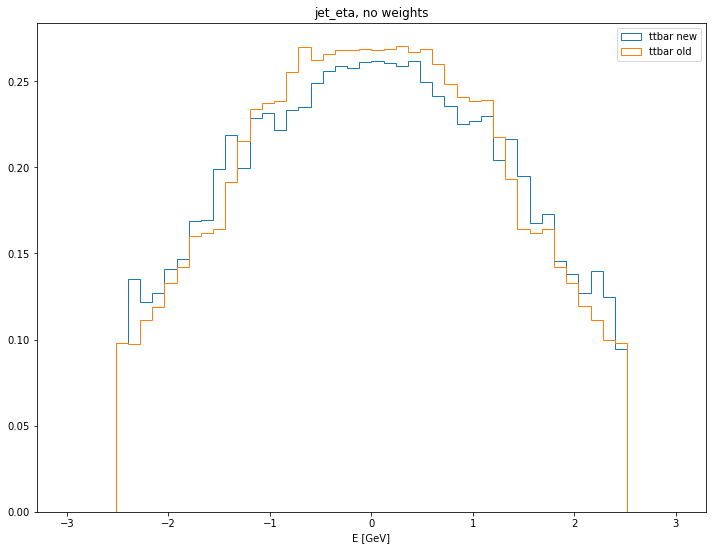

In [14]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_eta), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_eta), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_eta, no weights")
plt.xlabel("E [GeV]")
plt.show()

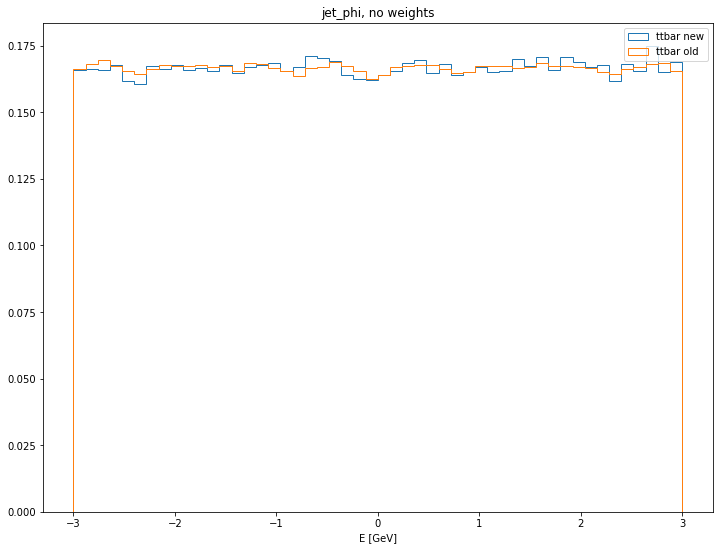

In [15]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_phi), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_phi), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_phi, no weights")
plt.xlabel("E [GeV]")
plt.show()

In [16]:
(data_new[sample].jet_pt)

<Array [[84.9], [106, 78.2], ..., [...], []] type='164409 * var * float32'>

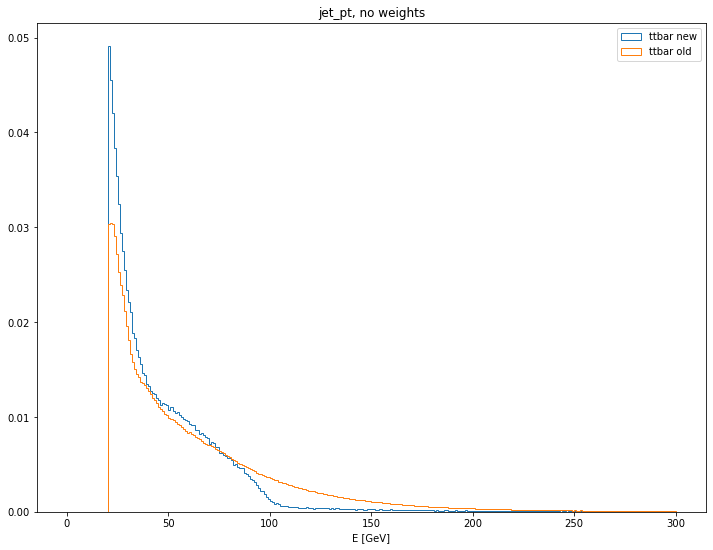

In [17]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_pt), range=(0, 300), bins=300, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_pt)/ 1000, range=(0, 300) , bins=300, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_pt, no weights")
plt.xlabel("E [GeV]")
plt.show()


In [18]:
data_new[sample].ScaleFactor_BTAG
data_old[sample].scaleFactor_BTAG
data_new[sample].ScaleFactor_PHOTON
#data_old[sample].scaleFactor_PHOTON

<Array [0, 0, 0, 0.98, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0] type='164409 * float32'>

Mean weight for ttbar new: 0.10546368925971206
Mean jet_e for ttbar new: 127.21134421134421
Mean weight for ttbar old: 0.9658686930496378
Mean jet_e for ttbar old: 207.10520609031627


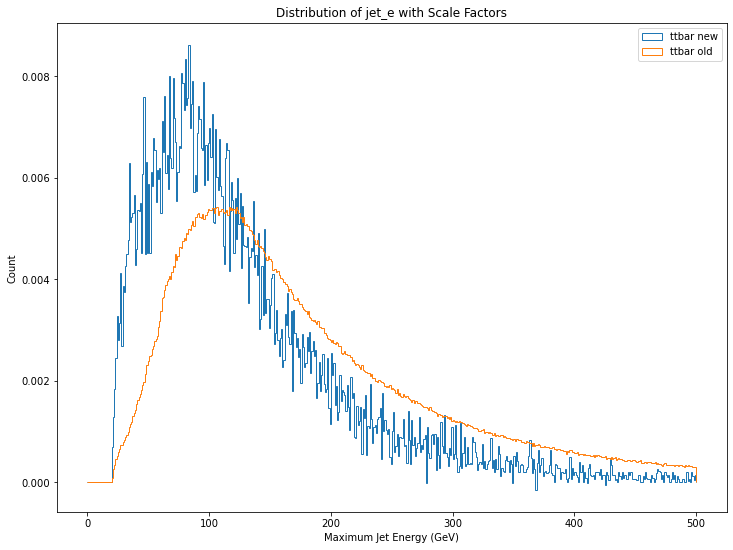

In [19]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Calculate weights for new sample data
    weights_new = (
         # Check if it should be 735 or 736
        data_new[sample].ScaleFactor_PILEUP *
        data_new[sample].ScaleFactor_ELE *
        data_new[sample].ScaleFactor_MUON*
        data_new[sample].ScaleFactor_BTAG*
        data_new[sample].ScaleFactor_TAU*
        data_new[sample].ScaleFactor_PHOTON
        
    )
    
    # Calculate and print the mean value of the weights for new sample data
    mean_weights_new = ak.mean(weights_new)
    print(f"Mean weight for {sample} new: {mean_weights_new}")
    
    # Calculate and print the mean value of jet_e for new sample data
    mean_jet_e_new = ak.mean(ak.max(data_new[sample].jet_e, axis=1))
    print(f"Mean jet_e for {sample} new: {mean_jet_e_new}")
    
    
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].jet_e, axis=1), 
        range=(0, 500),
        weights=weights_new,
        bins=500,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Calculate weights for old sample data
    weights_old = (
          # Should always be 1, verify why
        data_old[sample].scaleFactor_PILEUP *
        data_old[sample].scaleFactor_ELE *
        data_old[sample].scaleFactor_MUON*
        #data_old[sample].scaleFactor_LepTRIGGER*
        data_old[sample].scaleFactor_BTAG*
        data_old[sample].scaleFactor_TAU*
        data_old[sample].scaleFactor_PHOTON
        
    )
    
    # Calculate and print the mean value of the weights for old sample data
    mean_weights_old = ak.mean(weights_old)
    print(f"Mean weight for {sample} old: {mean_weights_old}")
    
    # Calculate and print the mean value of jet_e for old sample data
   
    mean_jet_e_old = ak.mean(ak.max(data_old[sample].jet_E, axis=1) / 1000)  # scaleFactor from MeV to GeV?
    print(f"Mean jet_e for {sample} old: {mean_jet_e_old}")
    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].jet_E, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 500),
        weights=weights_old,
        bins=500,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_e with Scale Factors")
plt.xlabel("Maximum Jet Energy (GeV)")
plt.ylabel("Count")

plt.show()


Mean weight for ttbar new: 0.6904330435073506
Mean jet_e for ttbar new: 127.21134421134421
Mean MIN jet_e for ttbar new: 69.48266581902945
Mean weight for ttbar old: 0.9693754318358214
Mean jet_e for ttbar old: 207.10520609031627
Mean MIN jet_e for ttbar old: 64.21810629315097


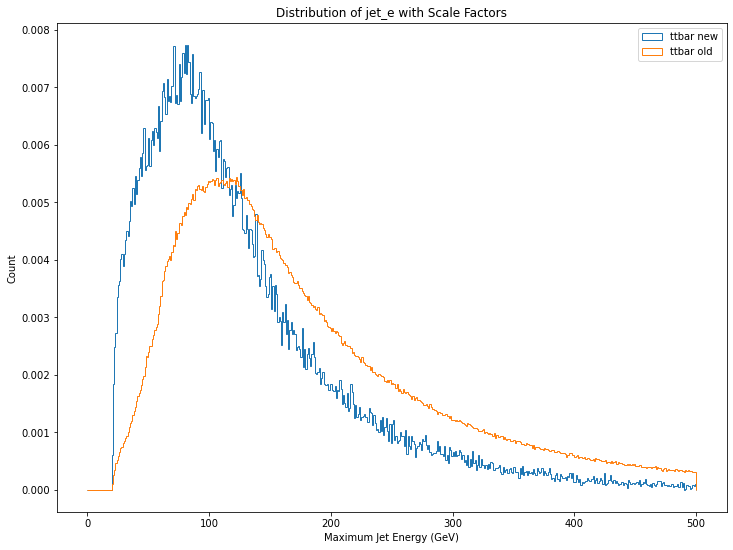

In [20]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Calculate weights for new sample data
    weights_new = (
        #data_new[sample].mcWeight *  # Check if it should be 735 or 736
        data_new[sample].ScaleFactor_PILEUP *
        data_new[sample].ScaleFactor_ELE *
        data_new[sample].ScaleFactor_MUON
    )
    
    # Calculate and print the mean value of the weights for new sample data
    mean_weights_new = ak.mean(weights_new)
    print(f"Mean weight for {sample} new: {mean_weights_new}")
    
    # Calculate and print the mean value of jet_e for new sample data
    mean_jet_e_new = ak.mean(ak.max(data_new[sample].jet_e, axis=1))
    print(f"Mean jet_e for {sample} new: {mean_jet_e_new}")
    mean_jet_e_new = ak.mean(ak.min(data_new[sample].jet_e, axis=1))
    print(f"Mean MIN jet_e for {sample} new: {mean_jet_e_new}")
    
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].jet_e, axis=1), 
        range=(0, 500),
        weights=weights_new,
        bins=500,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Calculate weights for old sample data
    weights_old = (
       # data_old[sample].mcWeight *  # Should always be 1, verify why
        data_old[sample].scaleFactor_PILEUP *
        data_old[sample].scaleFactor_ELE *
        data_old[sample].scaleFactor_MUON
      
    )
    
    # Calculate and print the mean value of the weights for old sample data
    mean_weights_old = ak.mean(weights_old)
    print(f"Mean weight for {sample} old: {mean_weights_old}")
    
    # Calculate and print the mean value of jet_e for old sample data
    mean_jet_e_old = ak.mean(ak.max(data_old[sample].jet_E, axis=1) / 1000)  # scaleFactor from MeV to GeV?
    print(f"Mean jet_e for {sample} old: {mean_jet_e_old}")
    mean_jet_e_old = ak.mean(ak.min(data_old[sample].jet_E, axis=1) / 1000)  # scaleFactor from MeV to GeV?
    print(f"Mean MIN jet_e for {sample} old: {mean_jet_e_old}")
    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].jet_E, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 500),
        weights=weights_old,
        bins=500,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_e with Scale Factors")
plt.xlabel("Maximum Jet Energy (GeV)")
plt.ylabel("Count")

plt.show()


Mean weight for ttbar new: 0.6904330435073506
Mean jet_e for ttbar new: 127.21134421134421
Mean MIN jet_e for ttbar new: 69.48266581902945
Mean weight for ttbar old: 0.9693754318358214
Mean jet_e for ttbar old: 207.10520609031627
Mean MIN jet_e for ttbar old: 64.21810629315097


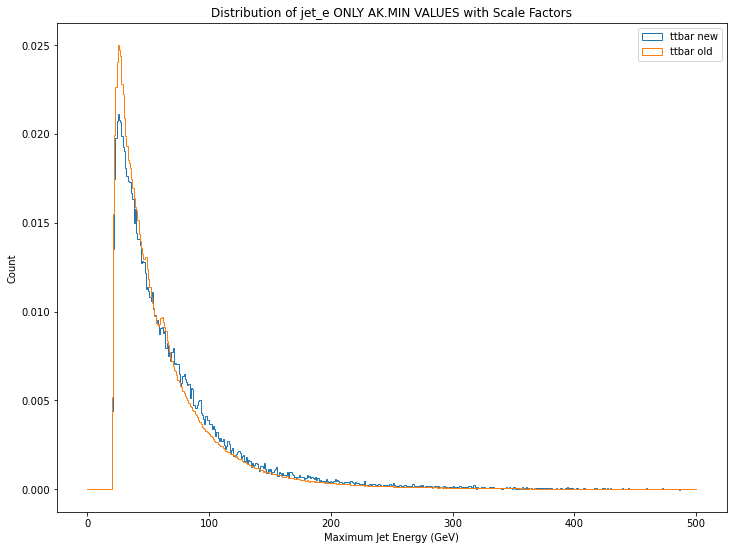

In [21]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Calculate weights for new sample data
    weights_new = (
        #data_new[sample].mcWeight *  # Check if it should be 735 or 736
        data_new[sample].ScaleFactor_PILEUP *
        data_new[sample].ScaleFactor_ELE *
        data_new[sample].ScaleFactor_MUON
    )
    
    # Calculate and print the mean value of the weights for new sample data
    mean_weights_new = ak.mean(weights_new)
    print(f"Mean weight for {sample} new: {mean_weights_new}")
    
    # Calculate and print the mean value of jet_e for new sample data
    mean_jet_e_new = ak.mean(ak.max(data_new[sample].jet_e, axis=1))
    print(f"Mean jet_e for {sample} new: {mean_jet_e_new}")
    mean_jet_e_new = ak.mean(ak.min(data_new[sample].jet_e, axis=1))
    print(f"Mean MIN jet_e for {sample} new: {mean_jet_e_new}")
    
    # Plot new sample data
    plt.hist(
        ak.min(data_new[sample].jet_e, axis=1), 
        range=(0, 500),
        weights=weights_new,
        bins=500,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Calculate weights for old sample data
    weights_old = (
        data_old[sample].mcWeight *  # Should always be 1, verify why
        data_old[sample].scaleFactor_PILEUP *
        data_old[sample].scaleFactor_ELE *
        data_old[sample].scaleFactor_MUON
    )
    
    # Calculate and print the mean value of the weights for old sample data
    mean_weights_old = ak.mean(weights_old)
    print(f"Mean weight for {sample} old: {mean_weights_old}")
    
    # Calculate and print the mean value of jet_e for old sample data
    mean_jet_e_old = ak.mean(ak.max(data_old[sample].jet_E, axis=1) / 1000)  # scaleFactor from MeV to GeV?
    print(f"Mean jet_e for {sample} old: {mean_jet_e_old}")
    mean_jet_e_old = ak.mean(ak.min(data_old[sample].jet_E, axis=1) / 1000)  # scaleFactor from MeV to GeV?
    print(f"Mean MIN jet_e for {sample} old: {mean_jet_e_old}")
    # Plot old sample data
    plt.hist(
        ak.min(data_old[sample].jet_E, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 500),
        weights=weights_old,
        bins=500,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_e ONLY AK.MIN VALUES with Scale Factors")
plt.xlabel("Maximum Jet Energy (GeV)")
plt.ylabel("Count")

plt.show()


Mean weight for ttbar new: 0.6904330435073506
Mean jet_e for ttbar new: 127.21134421134421
Mean weight for ttbar old: 0.9693754318358214
Mean jet_e for ttbar old: 207.10520609031627


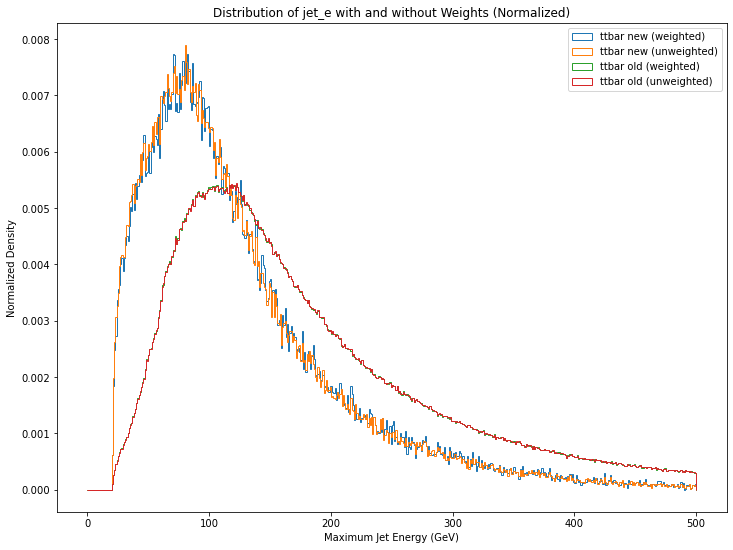

In [22]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Calculate weights for new sample data
    weights_new = (
       
        data_new[sample].ScaleFactor_PILEUP *
        data_new[sample].ScaleFactor_ELE *
        data_new[sample].ScaleFactor_MUON
    )
    
    # Calculate and print the mean value of the weights for new sample data
    mean_weights_new = ak.mean(weights_new)
    print(f"Mean weight for {sample} new: {mean_weights_new}")
    
    # Calculate and print the mean value of jet_e for new sample data
    mean_jet_e_new = ak.mean(ak.max(data_new[sample].jet_e, axis=1))
    print(f"Mean jet_e for {sample} new: {mean_jet_e_new}")
    
    # Plot new sample data with normalization and weights
    plt.hist(
        ak.max(data_new[sample].jet_e, axis=1), 
        range=(0, 500),
        weights=weights_new,
        bins=500,
        label=f"{sample} new (weighted)",
        density=True,
        histtype="step"
    )

    # Plot new sample data with normalization and no weights
    plt.hist(
        ak.max(data_new[sample].jet_e, axis=1), 
        range=(0, 500),
        weights=None,
        bins=500,
        label=f"{sample} new (unweighted)",
        density=True,
        histtype="step"
    )

    # Calculate weights for old sample data
    weights_old = (
        data_old[sample].mcWeight *  # Should always be 1, verify why
        data_old[sample].scaleFactor_PILEUP *
        data_old[sample].scaleFactor_ELE *
        data_old[sample].scaleFactor_MUON
    )
    
    # Calculate and print the mean value of the weights for old sample data
    mean_weights_old = ak.mean(weights_old)
    print(f"Mean weight for {sample} old: {mean_weights_old}")
    
    # Calculate and print the mean value of jet_e for old sample data
    mean_jet_e_old = ak.mean(ak.max(data_old[sample].jet_E, axis=1) / 1000)  # scaleFactor from MeV to GeV?
    print(f"Mean jet_e for {sample} old: {mean_jet_e_old}")
    
    # Plot old sample data with normalization and weights
    plt.hist(
        ak.max(data_old[sample].jet_E, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 500),
        weights=weights_old,
        bins=500,
        label=f"{sample} old (weighted)",
        density=True,
        histtype="step"
    )

    # Plot old sample data with normalization and no weights
    plt.hist(
        ak.max(data_old[sample].jet_E, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 500),
        weights=None,
        bins=500,
        label=f"{sample} old (unweighted)",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_e with and without Weights (Normalized)")
plt.xlabel("Maximum Jet Energy (GeV)")
plt.ylabel("Normalized Density")

plt.show()


Mean weight for ttbar new: 504.3087908812778
Mean jet_pt for ttbar new: 61.13510630783358
Mean weight for ttbar old: 0.9693754318358214
Mean jet_pt for ttbar old: 99.17169588402466


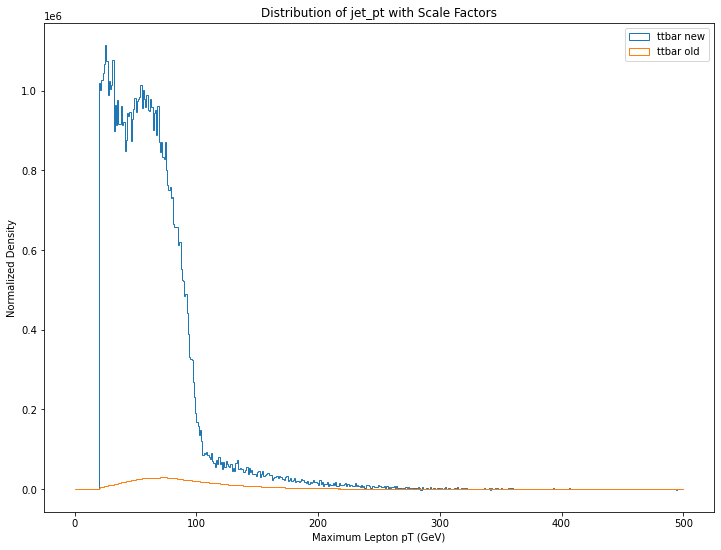

In [23]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Calculate weights for new sample data
    weights_new = (
        data_new[sample].mcWeight *  # Check if it should be 735 or 736
        data_new[sample].ScaleFactor_PILEUP *
        data_new[sample].ScaleFactor_ELE *
        data_new[sample].ScaleFactor_MUON
    )
    
    # Calculate and print the mean value of the weights for new sample data
    mean_weights_new = ak.mean(weights_new)
    print(f"Mean weight for {sample} new: {mean_weights_new}")
    
    # Calculate and print the mean value of jet_pt for new sample data
    mean_jet_pt_new = ak.mean(ak.max(data_new[sample].jet_pt, axis=1))
    print(f"Mean jet_pt for {sample} new: {mean_jet_pt_new}")
    
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].jet_pt, axis=1), 
        range=(0, 500),
        weights=weights_new,
        bins=500,
        label=f"{sample} new",
        density=False,
        histtype="step"
    )

    # Calculate weights for old sample data
    weights_old = (
        data_old[sample].mcWeight *  # Should always be 1, verify why
        data_old[sample].scaleFactor_PILEUP *
        data_old[sample].scaleFactor_ELE *
        data_old[sample].scaleFactor_MUON
    )
    
    # Calculate and print the mean value of the weights for old sample data
    mean_weights_old = ak.mean(weights_old)
    print(f"Mean weight for {sample} old: {mean_weights_old}")
    
    # Calculate and print the mean value of jet_pt for old sample data
    mean_jet_pt_old = ak.mean(ak.max(data_old[sample].jet_pt, axis=1) / 1000)  # scaleFactor from MeV to GeV?
    print(f"Mean jet_pt for {sample} old: {mean_jet_pt_old}")
    
    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].jet_pt, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 500),
        weights=weights_old,
        bins=500,
        label=f"{sample} old",
        density=False,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_pt with Scale Factors")
plt.xlabel("Maximum Lepton pT (GeV)")
plt.ylabel("Normalized Density")

plt.show()


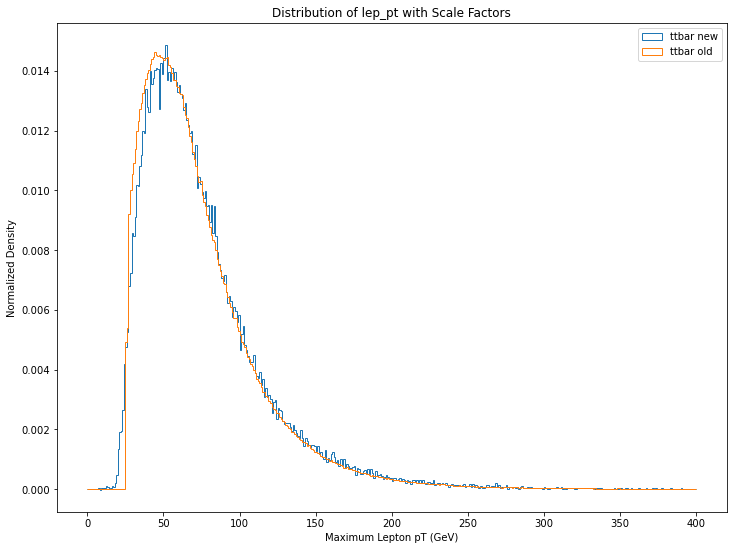

In [24]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].lep_pt, axis=1), 
        range=(0, 400),
        weights=(
            data_new[sample].ScaleFactor_PILEUP *
            data_new[sample].ScaleFactor_ELE *
            data_new[sample].ScaleFactor_MUON
        ),
        bins=400,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].lep_pt, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 400),
        weights=(
            data_old[sample].scaleFactor_PILEUP *
            data_old[sample].scaleFactor_ELE *
            data_old[sample].scaleFactor_MUON
        ),
        bins=400,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of lep_pt with Scale Factors")
plt.xlabel("Maximum Lepton pT (GeV)")
plt.ylabel("Normalized Density")

plt.show()


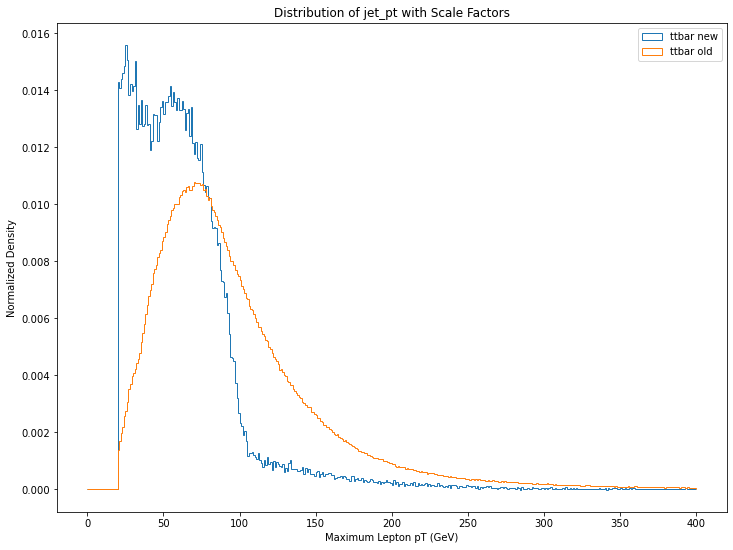

In [25]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        ak.max(data_new[sample].jet_pt, axis=1), 
        range=(0, 400),
        weights=(
            data_new[sample].ScaleFactor_PILEUP *
            data_new[sample].ScaleFactor_ELE *
            data_new[sample].ScaleFactor_MUON
        ),
        bins=400,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        ak.max(data_old[sample].jet_pt, axis=1) / 1000,  # scaleFactor from MeV to GeV?
        range=(0, 400),
        weights=(
            data_old[sample].scaleFactor_PILEUP *
            data_old[sample].scaleFactor_ELE *
            data_old[sample].scaleFactor_MUON
        ),
        bins=400,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Distribution of jet_pt with Scale Factors")
plt.xlabel("Maximum Lepton pT (GeV)")
plt.ylabel("Normalized Density")

plt.show()


In [26]:
data_old[sample].lep_n

<Array [2, 2, 2, 2, 2, 2, 2, ..., 2, 2, 2, 2, 2, 2, 2] type='2910539 * uint32'>

In [27]:
data_new[sample].lep_n

<Array [2, 3, 2, 4, 2, 2, 2, 2, ..., 2, 2, 2, 3, 2, 2, 2] type='164409 * int32'>

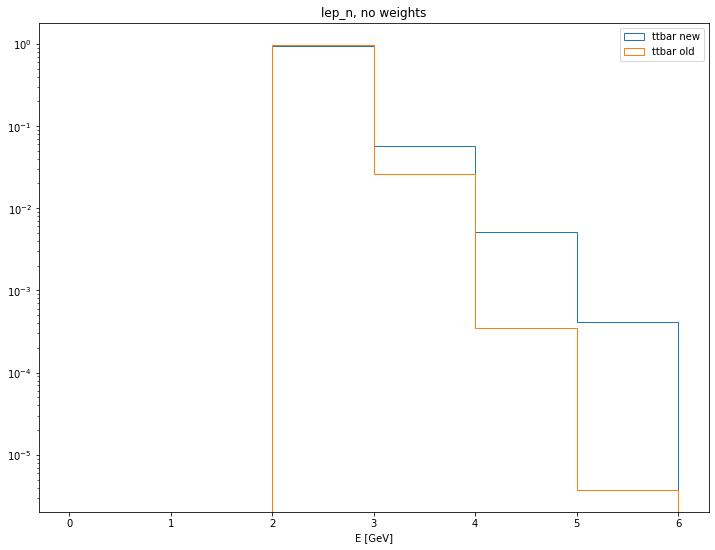

In [28]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist((data_new[sample].lep_n), range=(0, 6), bins=6, label=f"{sample} new", density=True, histtype="step", log = True)
    plt.hist((data_old[sample].lep_n), range=(0, 6), bins=6, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_n, no weights")
plt.xlabel("E [GeV]")
plt.show()

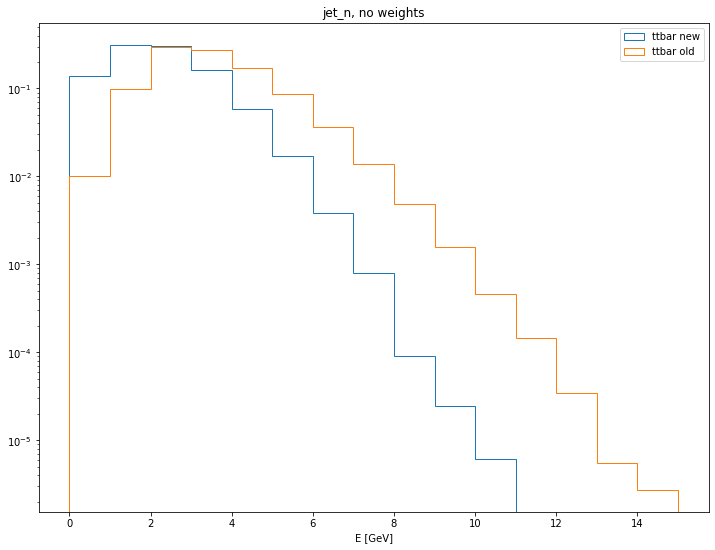

In [29]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist((data_new[sample].jet_n), range=(-0, 15), bins=15, label=f"{sample} new", density=True, histtype="step",log = True)
    plt.hist((data_old[sample].jet_n), range=(-0, 15), bins=15, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_n, no weights")
plt.xlabel("E [GeV]")
plt.show()

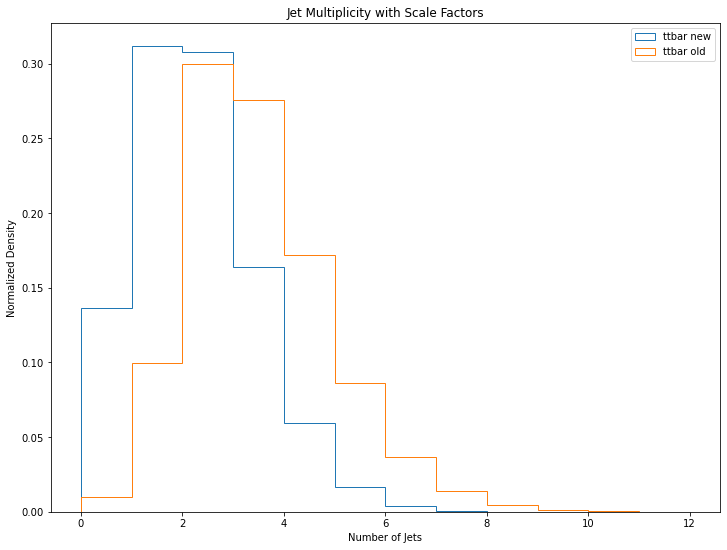

In [30]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        data_new[sample].jet_n,
        range=(0, 12),
        weights=(data_new[sample].ScaleFactor_PILEUP *
                 data_new[sample].ScaleFactor_ELE *
                 data_new[sample].ScaleFactor_MUON),
        bins=12,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        data_old[sample].jet_n,
        range=(0, 12),
        weights=(data_old[sample].scaleFactor_PILEUP *
                 data_old[sample].scaleFactor_ELE *
                 data_old[sample].scaleFactor_MUON),
        bins=12,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Jet Multiplicity with Scale Factors")
plt.xlabel("Number of Jets")
plt.ylabel("Normalized Density")
plt.show()


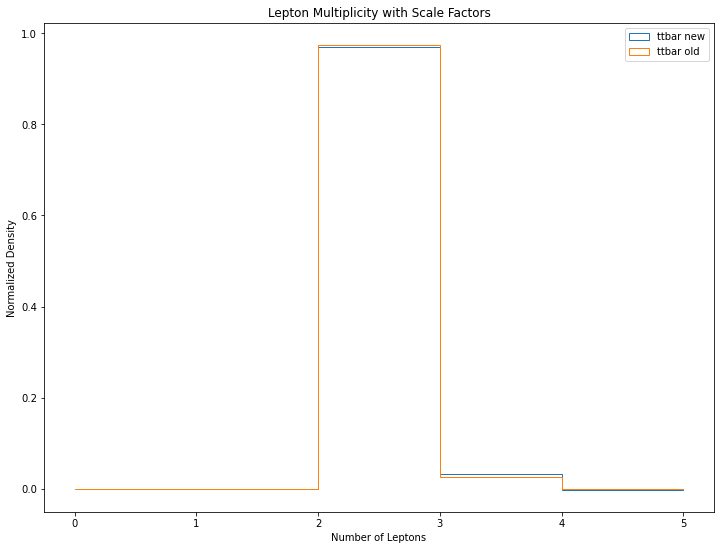

In [31]:
import matplotlib.pyplot as plt
import awkward as ak

plt.figure(figsize=(12, 9))

for sample in samples_new:
    # Plot new sample data
    plt.hist(
        data_new[sample].lep_n,
        range=(0, 5),
        weights=(data_new[sample].ScaleFactor_PILEUP *
                 data_new[sample].ScaleFactor_ELE *
                 data_new[sample].ScaleFactor_MUON),
        bins=5,
        label=f"{sample} new",
        density=True,
        histtype="step"
    )

    # Plot old sample data
    plt.hist(
        data_old[sample].lep_n,
        range=(0, 5),
        weights=(data_old[sample].scaleFactor_PILEUP *
                 data_old[sample].scaleFactor_ELE *
                 data_old[sample].scaleFactor_MUON),
        bins=5,
        label=f"{sample} old",
        density=True,
        histtype="step"
    )

plt.legend()
plt.title("Lepton Multiplicity with Scale Factors")
plt.xlabel("Number of Leptons")
plt.ylabel("Normalized Density")
plt.show()
